In [2]:
!pip install scikit-learn
!pip install scipy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

<h1>Prepare Data</h1>

In [4]:
df = pd.read_csv("../dataset/mental_health_dataset.csv")

In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [8]:
df.drop(['Person ID', 'Blood Pressure', 'Heart Rate', 'Daily Steps'],axis=1,inplace=True)

In [9]:
df.columns = ['gender', 'age', 'occupation', 'sleep_duration', 'sleep_quality', 'physical_activity', 'stress_level', 'bmi', 'sleep_disorder']

<h1>Analyze Data</h1>

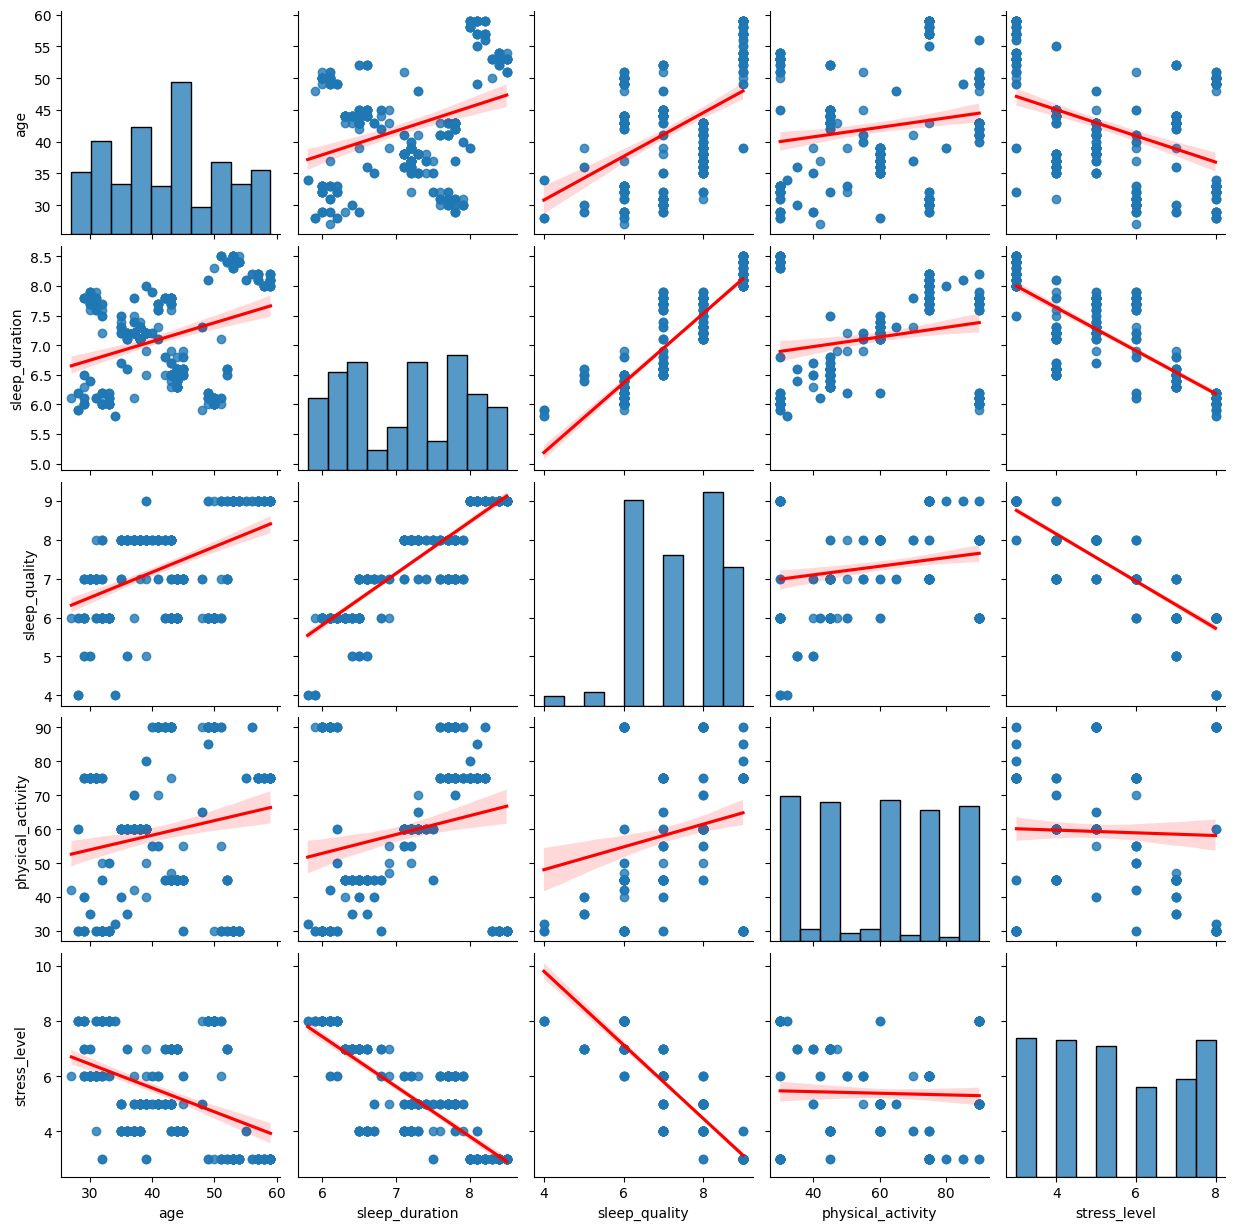

In [10]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

Key:

* With bigger age people tend to have better sleep, which helps reduce stress.
* We can see correlation between sleep duration and sleep quality. One affects another

C:\Users\Admin\AppData\Local\Temp\ipykernel_2392\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2392\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2392\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2392\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

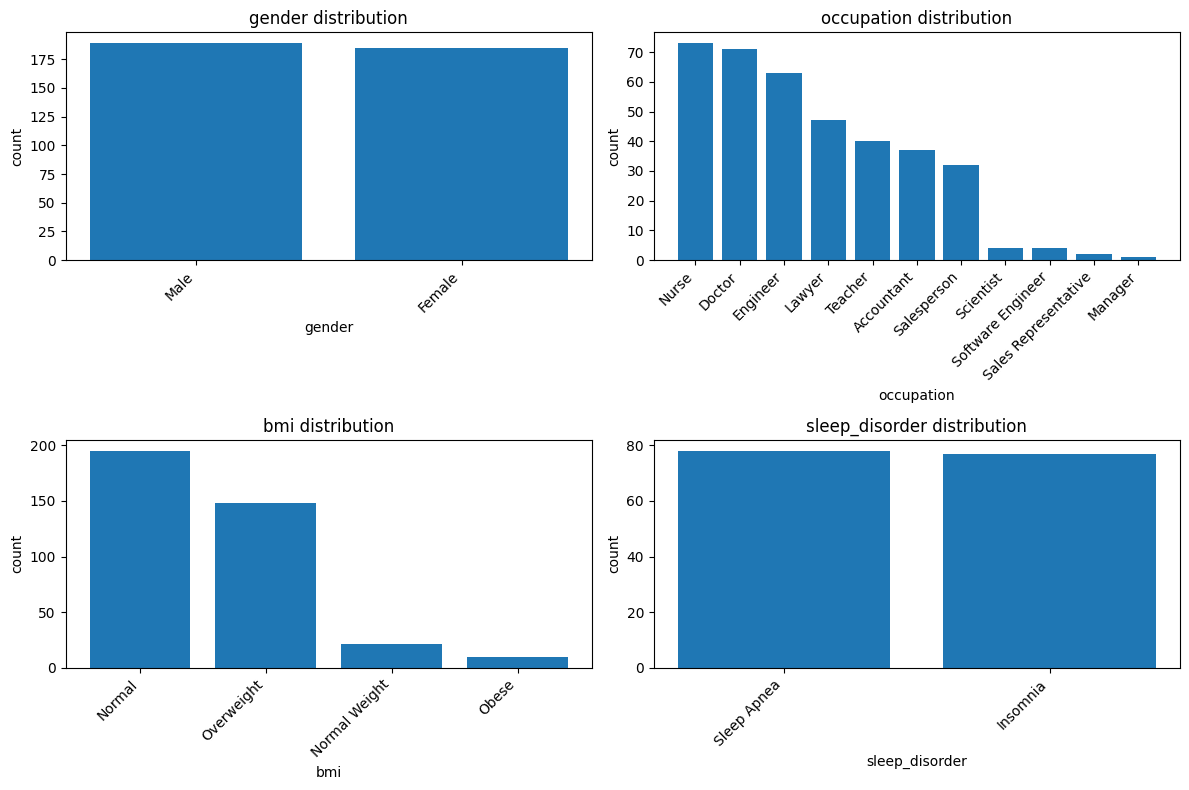

In [11]:
categories = ['gender', 'occupation', 'bmi', 'sleep_disorder']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2

    counts = df[category].value_counts()
    
    axes[row, col].bar(counts.index, counts)
    axes[row, col].set_title(f'{category} distribution')
    axes[row, col].set_xlabel(category)
    axes[row, col].set_ylabel('count')
    
    axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Key:

* Significant amount of interviewed have overweight
* Third of the interviewed have trouble or lack of sleep



C:\Users\Admin\AppData\Local\Temp\ipykernel_2392\2555387465.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='sleep_quality',  palette=['#0000FF', '#FF0000'])


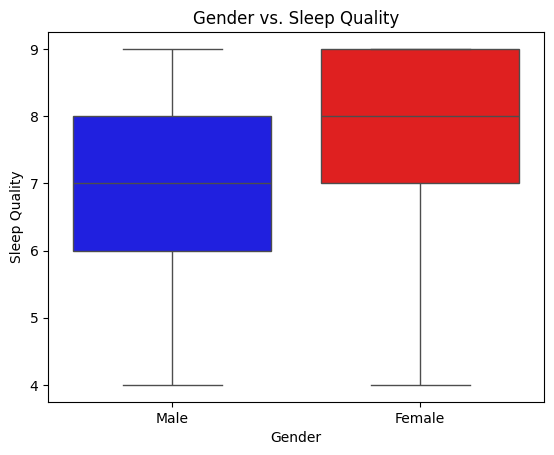

In [12]:
sns.boxplot(data=df, x='gender', y='sleep_quality',  palette=['#0000FF', '#FF0000'])

plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.title('Gender vs. Sleep Quality')

plt.show()

Key:

* Females have better sleep quality than males, which could be reason why women are less stressed

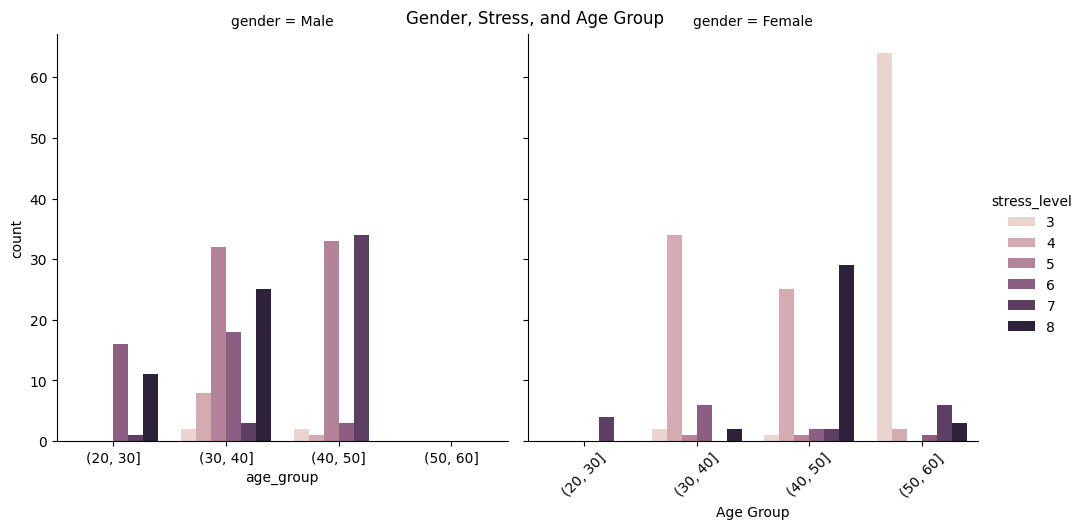

In [13]:
age_groups = [20, 30, 40, 50, 60]
df['age_group'] = pd.cut(df['age'], bins=age_groups)

sns.catplot(data=df, x='age_group', hue='stress_level', col='gender', kind='count')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.suptitle('Gender, Stress, and Age Group')
plt.xticks(rotation=45)
plt.show()

Key:

Males

* Men en their 20s feel under a lot of stress
* In their 30s dispersion of stress level is wider
* In their 40s they are pretty equal between normal and high level of stress

Females

* young women also feel under stress
* Much easier at their 30s
* Strong dividness between easiness and very high stress in their 40s
* Significally less stressed in their 50s

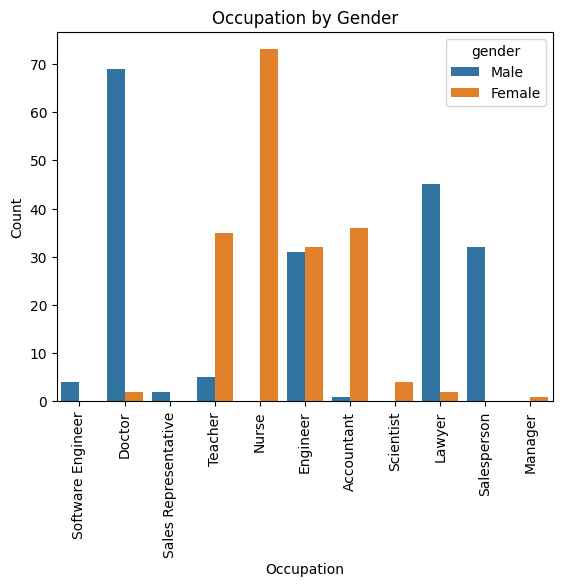

In [14]:
sns.countplot(data=df, x='occupation', hue='gender')

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation by Gender')
plt.xticks(rotation=90)
plt.show()

Key:

* All salespersons and sales representatives are men
* Almost all doctors and lawyers are men
* All scientists are women


* Doctors, Salespersons, Scientists and Sales Representatives feel more stressed
* Nurses divided by 2 experience: their job very stressful or not stressful at all
* Lawyers are somewhere in the middle. Their job is not that intense
* Teachers and Accountants and Engineers are feel less stressful


Hense, the most stressful jobs are mostly taken by men. 

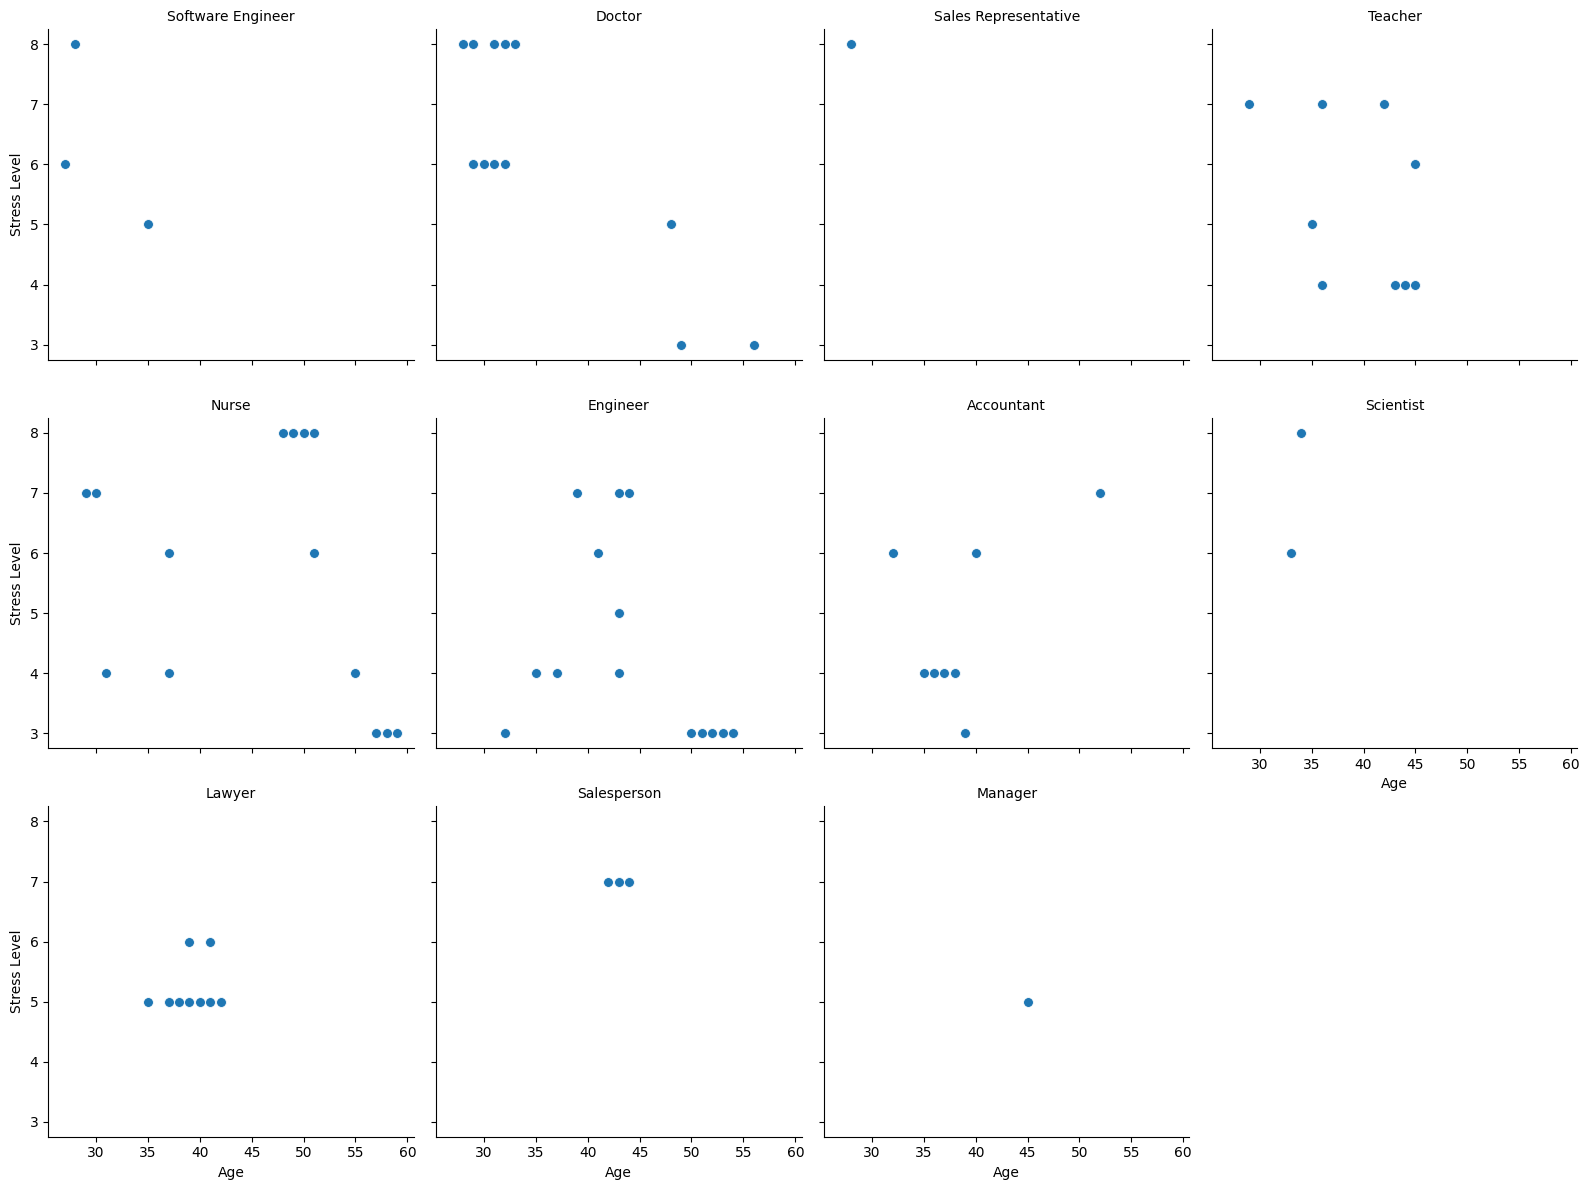

In [15]:
grid = sns.FacetGrid(data=df, col='occupation', col_wrap=4, height=4)
grid.map(sns.scatterplot, 'age', 'stress_level', s=50)

grid.set_axis_labels('Age', 'Stress Level')
grid.set_titles(col_template="{col_name}")

grid.tight_layout()
plt.show()

Key:

* With age doctors, teachers and engineers are less stressed
* Accountants are more stressed with age
* Nurses have different distribution, going down with age, raising at pick near 50 years and then significally go down. 

<h1>Classification</h1>
<h3>Predict whether a person has a sleep disorder</h3>

In [18]:
df.isnull().sum()

gender               0
age                  0
occupation           0
sleep_duration       0
sleep_quality        0
physical_activity    0
stress_level         0
bmi                  0
sleep_disorder       0
age_group            0
dtype: int64

In [17]:
df["sleep_disorder"].fillna("no sleep disorder", inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2392\557049971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sleep_disorder"].fillna("no sleep disorder", inplace=True)


In [ ]:
# One-Hot Encoding for nominal categories
df = pd.get_dummies(df, columns=['gender', 'occupation', 'bmi_category'], drop_first=True)

# Label Encoding for ordinal or binary categories (e.g., sleep disorder)
label_encoder = LabelEncoder()
df['sleep_disorder'] = label_encoder.fit_transform(df['sleep_disorder'])

In [ ]:
scaler = StandardScaler()
# Scale features for classification model
df['sleep_duration'] = scaler.fit_transform(df[['sleep_duration']])
df['sleep_quality'] = scaler.fit_transform(df[['sleep_quality']])

# Scale features for regression model
df['stress_level'] = scaler.fit_transform(df[['stress_level']])

In [ ]:
# Features and target for classification
X_class = df[['sleep_duration', 'sleep_quality']]
y_class = df['sleep_disorder']

# Split into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [ ]:
# Train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Evaluate
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))

In [ ]:
# Features and target for regression
X_reg = df.drop(columns=['stress_level'])  # All other columns except stress_level
y_reg = df['stress_level']

# Split into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [ ]:
# Train the model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = rf_regressor.predict(X_test_reg)

# Evaluate
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

<h1>Hyperparameter Tuning</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_class = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search_class = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_class, cv=5)
grid_search_class.fit(X_train_class, y_train_class)

print("Best Parameters (Classification):", grid_search_class.best_params_)

In [ ]:
param_grid_reg = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_reg, cv=5)
grid_search_reg.fit(X_train_reg, y_train_reg)

print("Best Parameters (Regression):", grid_search_reg.best_params_)

<h1>Visualize Classification</h1>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Sleep Disorder Prediction")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_proba = rf_classifier.predict_proba(X_test_class)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Sleep Disorder Prediction")
plt.legend(loc="lower right")
plt.show()

<h1>Regression Visualization</h1>

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', lw=2)  # Diagonal line
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level")
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test_reg - y_pred_reg

# Plot residuals
plt.scatter(y_pred_reg, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Stress Level")
plt.ylabel("Residuals")
plt.title("Residual Plot for Stress Level Prediction")
plt.show()